In [2]:
import pandas as pd, glob

# Run bash inside Python with !
!git clone https://github.com/raghavdhir03/pesticides-health-risks.git

# Read parquet files into one dataframe
files = glob.glob("pesticides-health-risks/data/parquet/*.parquet")
df = pd.concat([pd.read_parquet(f) for f in files], ignore_index=True)
print(df.shape)


fatal: destination path 'pesticides-health-risks' already exists and is not an empty directory.
(50042520, 33)


In [3]:
df.head()

,SAMPLE_PK,COMMOD_x,COMMTYPE_x,LAB,PESTCODE,TESTCLASS,CONCEN,LOD,CONUNIT,CONFMETHOD,...,VARIETY,ORIGIN,COUNTRY,DISTTYPE,COMMTYPE_y,CLAIM,QUANTITY,GROWST,PACKST,DISTST
0,1,AP,FR,NY1,024,C,None,0.004,M,None,...,Golden Delicious,1,None,D,FR,NC,None,None,WA,WA
1,1,AP,FR,NY1,042,C,0.073,0.006,M,D,...,Golden Delicious,1,None,D,FR,NC,None,None,WA,WA
2,1,AP,FR,NY1,052,C,None,0.002,M,None,...,Golden Delicious,1,None,D,FR,NC,None,None,WA,WA
3,1,AP,FR,NY1,057,C,None,0.003,M,None,...,Golden Delicious,1,None,D,FR,NC,None,None,WA,WA
4,1,AP,FR,NY1,065,C,None,0.002,M,None,...,Golden Delicious,1,None,D,FR,NC,None,None,WA,WA


In [4]:
df.columns

Index(['SAMPLE_PK', 'COMMOD_x', 'COMMTYPE_x', 'LAB', 'PESTCODE', 'TESTCLASS',
       'CONCEN', 'LOD', 'CONUNIT', 'CONFMETHOD', 'CONFMETHOD2', 'ANNOTATE',
       'QUANTITATE', 'MEAN', 'EXTRACT', 'DETERMIN', 'STATE', 'YEAR', 'MONTH',
       'DAY', 'SITE', 'COMMOD_y', 'SOURCE_ID', 'VARIETY', 'ORIGIN', 'COUNTRY',
       'DISTTYPE', 'COMMTYPE_y', 'CLAIM', 'QUANTITY', 'GROWST', 'PACKST',
       'DISTST'],
      dtype='object')

Com - Commodity Code (2-letters) for product collected. Example: AP=Apples
Pest Code - FDA/PDP Pesticide Code (3-characters) for compound tested. Example: 011=Captan
Pest Name - Pesticide/compound Name
Tst - Code for Test Classification. Example: O=Pyrethroids
Concen - Concentration of residue detected. Zero (0) for non-detect.
LOD - Limit of Detection for pesticide/commodity pair
pp_ - Concentration/LOD unit of measure (M=parts-per-million, B=pp-billion, T=pp-trillion)
Co1 - Code for primary Confirmation method (1- or 2-letters). Example: LU=LC-MS/MS-triple quad
Co2 - Code for secondary Confirmation method (1- or 2-letters)
Ann - Code for Annotated Information (1- or 2-letters). Example: Q=Below Quantifiable Level
Qua - Code for Quantitative method (1- or 2-letters). Example: E=Estimate
Mea - Code for Mean Result finding (1- or 2-letters). Examples: ND=Non-Detect
Ext - Code for Extraction method (3-digits). Example: 805=MDA Modified QuEChERS Method
Det - Code for Determinative method (2-digits). Example: 35=GC/MS/MS - triple quadrupole
Tol (ppm) - Established EPA Tolerance Level for pesticide/commodity pair in parts-per-million (ppm).
Examples: 1.0 = 1.0 ppm, NT=No Tolerance; AL=FDA Action Level

A. Basic Structure & Quality
How many total samples are there?
How many unique commodities and unique pesticides are tested?
Are there any missing values in critical fields like Concentration, LOD, or EPA Tolerance?
What is the distribution of commodities (fruits, vegetables, grains, etc.) in the dataset?

In [5]:
# --- 1. How many total samples? ---
total_samples = df.shape[0]
print("Total samples:", total_samples) #total number of pesticide test results (samples × pesticide × commodity combinations)
total_columns = df.shape[1]
print("Total columns:" , total_columns)

Total samples: 50042520
Total columns: 33


Map New Names because the Paraquet file names are confusing

In [6]:
rename_dict = {
    "COMMOD_x": "Commodity",
    "PESTCODE": "Pest Code",
    "TESTCLASS": "Test Class",
    "CONCEN": "Concentration",
    "LOD": "LOD",
    "CONUNIT": "Unit",
    "CONFMETHOD": "Confirm Method 1",
    "CONFMETHOD2": "Confirm Method 2",
    "ANNOTATE": "Annotation",
    "QUANTITATE": "Quantitation",
    "MEAN": "Result",
    "EXTRACT": "Extraction",
    "DETERMINI": "Determinative",
    "TOL": "Tolerance (ppm)"
}

df = df.rename(columns=rename_dict)



In [7]:
df.head()

,SAMPLE_PK,Commodity,COMMTYPE_x,LAB,Pest Code,Test Class,Concentration,LOD,Unit,Confirm Method 1,...,VARIETY,ORIGIN,COUNTRY,DISTTYPE,COMMTYPE_y,CLAIM,QUANTITY,GROWST,PACKST,DISTST
0,1,AP,FR,NY1,024,C,None,0.004,M,None,...,Golden Delicious,1,None,D,FR,NC,None,None,WA,WA
1,1,AP,FR,NY1,042,C,0.073,0.006,M,D,...,Golden Delicious,1,None,D,FR,NC,None,None,WA,WA
2,1,AP,FR,NY1,052,C,None,0.002,M,None,...,Golden Delicious,1,None,D,FR,NC,None,None,WA,WA
3,1,AP,FR,NY1,057,C,None,0.003,M,None,...,Golden Delicious,1,None,D,FR,NC,None,None,WA,WA
4,1,AP,FR,NY1,065,C,None,0.002,M,None,...,Golden Delicious,1,None,D,FR,NC,None,None,WA,WA


In [8]:
print(df.columns.tolist())


['SAMPLE_PK', 'Commodity', 'COMMTYPE_x', 'LAB', 'Pest Code', 'Test Class', 'Concentration', 'LOD', 'Unit', 'Confirm Method 1', 'Confirm Method 2', 'Annotation', 'Quantitation', 'Result', 'Extraction', 'DETERMIN', 'STATE', 'YEAR', 'MONTH', 'DAY', 'SITE', 'COMMOD_y', 'SOURCE_ID', 'VARIETY', 'ORIGIN', 'COUNTRY', 'DISTTYPE', 'COMMTYPE_y', 'CLAIM', 'QUANTITY', 'GROWST', 'PACKST', 'DISTST']


In [9]:
# --- 2. Unique commodities and pesticides ---
unique_commodities = df['Commodity'].nunique()
unique_pesticides = df['Pest Code'].nunique()

print("Unique commodities:", unique_commodities)
print("Unique pesticides:", unique_pesticides)


Unique commodities: 134
Unique pesticides: 806


In [11]:

# --- 3. Missing values in critical fields ---
critical_cols = ['Concentration', 'LOD'] # add in tolerance later 
missing = df[critical_cols].isnull().sum()

print("\nMissing values in critical fields:")
print(missing)


Missing values in critical fields:
Concentration    49410045
LOD                     0
dtype: int64


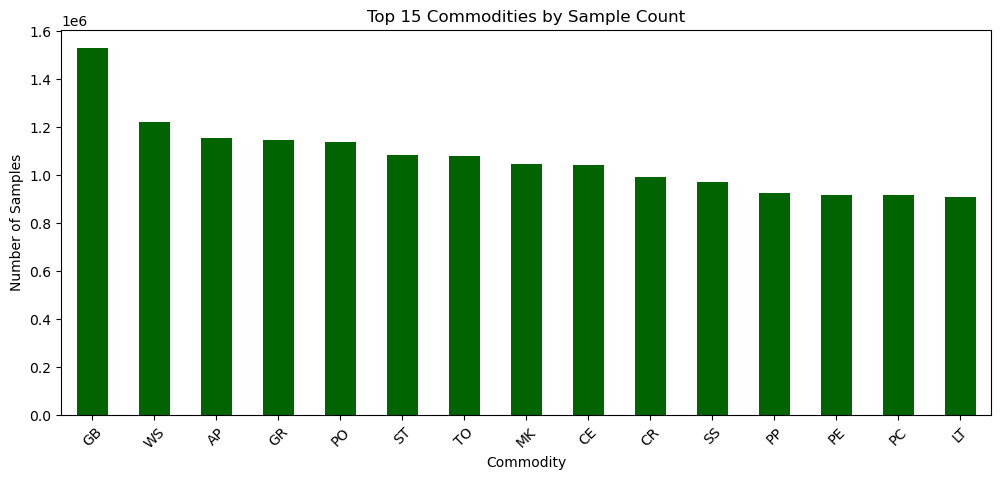

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
# --- 4. Distribution of commodities ---
plt.figure(figsize=(12,5))
df['Commodity'].value_counts().head(15).plot(kind='bar', color = 'darkgreen')
plt.title("Top 15 Commodities by Sample Count")
plt.ylabel("Number of Samples")
plt.xticks(rotation=45)
plt.show()

GB → Green Beans

WS → Winter Squash

AP → Apples

GR → Grapes

PO → Potatoes

ST → Strawberries

TO → Tomatoes

MK → Milk

CE → Celery

CR → Carrots

SS → Summer Squash

PP → Sweet Bell Peppers

PE → Pears

PC → Peaches

LT → Lettuce

B. Concentration & Detection
Which pesticides are most frequently detected?
What is the distribution of concentration values for the top 5 pesticides?

In [ ]:
# --- 1. Most frequently detected pesticides ---
# Convert Concentration column to numeric, coercing errors to NaN
df['Concentration'] = pd.to_numeric(df['Concentration'], errors='coerce')

# Treat anything with Concentration > 0 as detected
detected = df[df['Concentration'] > 0]
top_pesticides = detected['Pest Code'].value_counts().head(10)

print("\nTop 10 most frequently detected pesticides:")
print(top_pesticides)


Top 10 most frequently detected pesticides:
Pest Code
157    29189
967    22916
B48    15412
B75    14977
B61    14481
B23    13850
604    12395
626    12111
B80    11368
910    11341
Name: count, dtype: int64


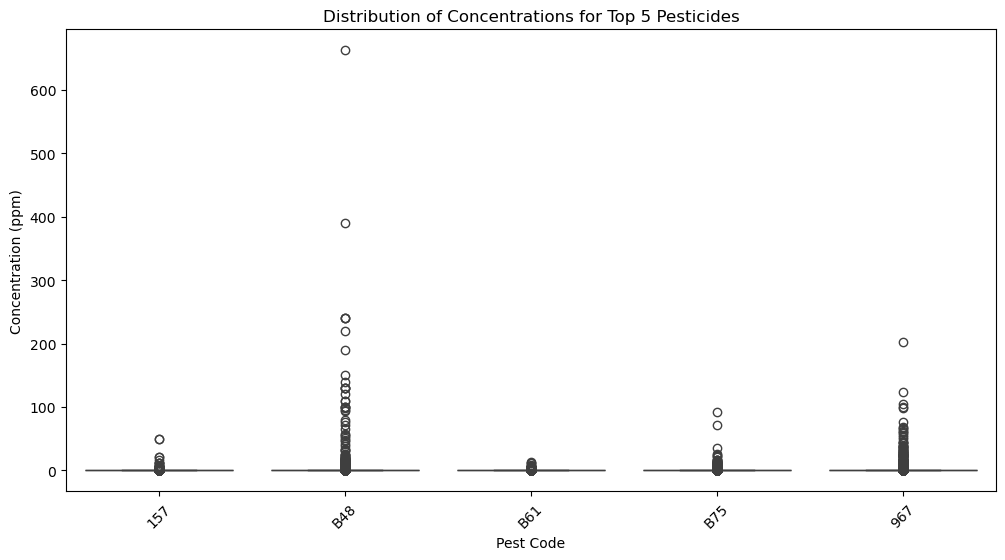

In [20]:
# --- 2. Distribution of concentration values for top 5 pesticides ---
top5 = top_pesticides.index[:5]
df_top5 = detected[detected['Pest Code'].isin(top5)]

plt.figure(figsize=(12,6))
sns.boxplot(data=df_top5, x="Pest Code", y="Concentration")
plt.title("Distribution of Concentrations for Top 5 Pesticides")
plt.ylabel("Concentration (ppm)")
plt.xticks(rotation=45)
plt.show()